# Clase 6, usando datos de acciones

Vamos a aprender a descargar datos historicos dela bolsa de valores y aplicar los conceptos que hemos visto 

- Leer archivos CSV
- Descargar datos historicos
- Obtener estadísticos básicos

In [2]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


Obtene estos tickers:

['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT', 
'BRK-A', 'NVDA', 'NFLX', 'WMT', 'V', 
'JPM', 'XOM', 'V', 'MA', 'TSLA', 'PEP', 'PG']

Del 2017 al 2023

In [3]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT', 'BRK-A', 'NVDA', 'NFLX', 'WMT', 'V', 'JPM', 'XOM', 'V', 'MA', 'TSLA', 'PEP', 'PG']
df = yf.download(tickers, start="2017-01-01", end="2023-12-31")['Adj Close'] 
df.head()


[*********************100%%**********************]  16 of 16 completed


,AAPL,AMZN,BRK-A,COST,GOOGL,JPM,MA,MSFT,NFLX,NVDA,PEP,PG,TSLA,V,WMT,XOM
Date,,,,,,,,,,,,,,,,
2017-01-03,27.059309,37.683498,245850.0,140.838501,40.400501,72.169777,101.347305,57.254700,127.489998,25.138283,86.186043,69.928986,14.466000,75.950867,60.387123,65.694740
2017-01-04,27.029020,37.859001,246600.0,140.865021,40.388500,72.302902,102.308929,56.998528,129.410004,25.724779,86.350777,70.178123,15.132667,76.571854,60.738914,64.971939
2017-01-05,27.166473,39.022499,244852.0,143.642471,40.651001,71.637321,103.099129,56.998528,131.809998,25.071737,86.235497,70.643211,15.116667,77.469887,60.870846,64.003395
2017-01-06,27.469334,39.799500,245394.0,143.571930,41.260502,71.645660,103.841125,57.492577,131.070007,25.406878,86.111938,70.618309,15.267333,78.539864,60.035316,63.967270
2017-01-09,27.720940,39.846001,243111.0,141.931915,41.359001,71.695587,103.638786,57.309589,130.949997,26.436960,85.206024,70.095085,15.418667,78.100426,60.431107,62.911991


In [4]:
# Obten el rendimiento esperado de cada acción y anualizalo
rt = df.pct_change().dropna()

rendimiento = rt.mean() * 252 
rendimiento 

AAPL     0.328134
AMZN     0.253225
BRK-A    0.144601
COST     0.233556
GOOGL    0.227336
JPM      0.151325
MA       0.255377
MSFT     0.302645
NFLX     0.269866
NVDA     0.555117
PEP      0.129664
PG       0.137783
TSLA     0.621309
V        0.209583
WMT      0.172729
XOM      0.134197
dtype: float64

In [4]:
# Obten la voladilidad de cada acción y anualizala
import numpy as np 
volatilidad = rt.std() * np.sqrt(252)

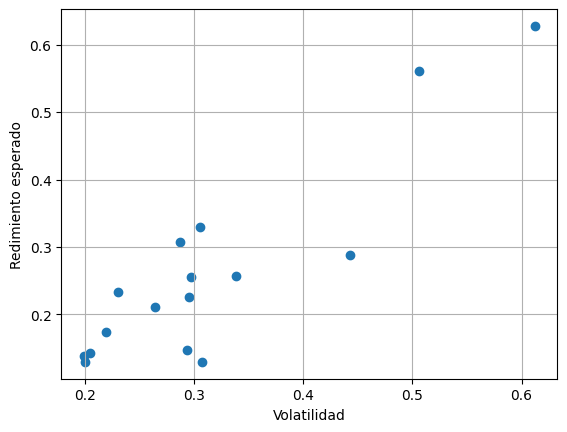

In [5]:
# Grafique la relación volatilidad y rendimiento 
plt.scatter(volatilidad, rendimiento)
plt.xlabel('Volatilidad')
plt.ylabel('Redimiento esperado')
plt.grid()

In [6]:
df = pd.DataFrame()
df['rendimiento'] = rendimiento 
df['volatilidad'] = volatilidad
df

,rendimiento,volatilidad
AAPL,0.330214,0.305588
AMZN,0.257150,0.338494
BRK-A,0.143015,0.204446
COST,0.233165,0.230385
GOOGL,0.226577,0.295429
JPM,0.146977,0.293654
MA,0.255970,0.297395
MSFT,0.307443,0.287542
NFLX,0.288552,0.443072
NVDA,0.560719,0.505786


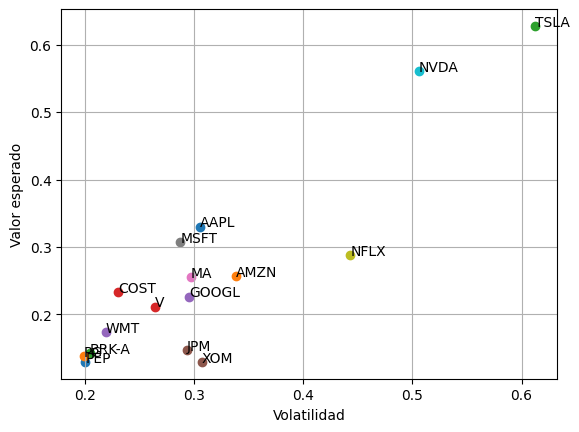

In [7]:
for i in range(len(df)): 
    flag_df = df.iloc[i]
    name = df.index[i]
    plt.scatter(flag_df['volatilidad'], flag_df['rendimiento'])
    plt.text(flag_df['volatilidad'], flag_df['rendimiento'], name)
plt.xlabel('Volatilidad')
plt.ylabel('Valor esperado')
plt.grid()

In [8]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Si modelamos la relacion entre volatilidad y riesgo de forma lineal, tenemos la siguiente ecuación:

$E[x] = \theta_0 + \theta_1 \sigma $

Crea una regresión lineal

In [9]:
# Obten variable dependiente y variable independiente 
from sklearn import linear_model

In [10]:
X = df[['volatilidad']]
y = df[['rendimiento']]
model = linear_model.LinearRegression().fit(X, y)
df['prediccion'] = model.predict(X)

In [11]:
# Entrena el modelo
model.fit(X, y)

LinearRegression()

In [12]:
# ¿Cuál es el intercepto?
model.intercept_

array([-0.09315548])

In [13]:
# ¿Cuál es el coeficiente?
model.coef_

array([[1.12936764]])

Escriba la ecuación del modelo

In [14]:
Rendimiento = -0.09 + 1.16 * volatilidad 

Grafique el modelo con la gráfica anterior

¿A mayor volatilidad, mayor rendimiento esperado?

### Aplicando la correlación y la covarianza 